Blogger Age Prediction
Team 2-9

Data Exploration

In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,post.id,user.id,gender,topic,sign,date,text,age
0,1,11869,male,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",15
1,2,11869,male,Student,Leo,"13,May,2004",These are the team members: Drewe...,15
2,3,11869,male,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,15
3,4,11869,male,Student,Leo,"12,May,2004",testing!!! testing!!!,15
4,5,16332,male,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,33


In [4]:
age = pd.Series(train['age'])

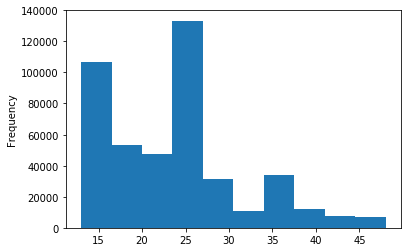

In [6]:
#histogram of ages
plots = age.plot(kind = "hist")

In [7]:
#count of posts by each gender
gender = pd.Series(train['gender'])
gender.value_counts()

female    227840
male      215121
Name: gender, dtype: int64

In [8]:
#how many posts about each topic
topic = pd.Series(train['topic'])
topics = topic.value_counts()
topics/len(topic)

indUnk                     0.359894
Student                    0.231953
Technology                 0.063992
Arts                       0.054887
Education                  0.041907
Communications-Media       0.029788
Non-Profit                 0.020399
Internet                   0.020013
Engineering                0.016117
Publishing                 0.012674
Law                        0.012421
Science                    0.011008
Consulting                 0.010249
Government                 0.008908
Religion                   0.007825
BusinessServices           0.007798
Marketing                  0.007066
Fashion                    0.006220
Chemicals                  0.006050
Museums-Libraries          0.005951
Sports-Recreation          0.005696
Advertising                0.005648
Telecommunications         0.005563
HumanResources             0.005134
Banking                    0.004964
Accounting                 0.004933
Military                   0.004052
RealEstate                 0

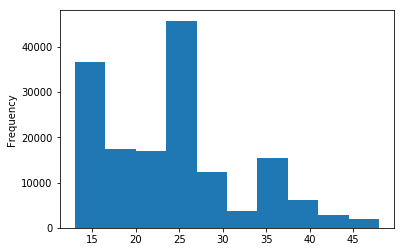

In [9]:
#histogram for top age of indunk, mirrors general breakdown
indunk = train.loc[train['topic'] == 'indUnk']
indunkage = indunk['age']
indunkage.plot(kind = 'hist')

Data Exploration/Pre Cleaning Feature Creation

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# counting number of words

train['word_count_basic'] = train['text'].apply(lambda x: len(str(x).split(" ")))
test['word_count_basic'] = test['text'].apply(lambda x: len(str(x).split(" ")))

# counting number of characters

train['char_count_basic'] = train['text'].str.len() ## this also includes spaces
test['char_count_basic'] = test['text'].str.len() ## this also includes spaces

from nltk.corpus import stopwords

stop = stopwords.words('english')

train['stopwords_basic'] = train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
test['stopwords_basic'] = test['text'].apply(lambda x: len([x for x in x.split() if x in stop]))


# counting number count

train['number_count_basic'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
test['number_count_basic'] = test['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

# counting special characters

def countSpecialChar(str): 
  
    # initializing variables (initial count)
    char = 0
    specialChar = 0
    digit = 0
    space = 0
  
    # str.length() function to count  
    # number of character in given string. 
    for i in range(0, len(str)):  
          
        ch = str[i]
          
        if ( (ch >= 'a' and ch <= 'z') or 
             (ch >= 'A' and ch <= 'Z') ):  
            char += 1
            
        elif (ch >= '0' and ch <= '9'): 
            digit += 1
        elif (ch == ' '):
            space += 1
        else: 
            specialChar += 1
    return (specialChar)
    
train['special_character_basic'] = train['text'].apply(countSpecialChar)
test['special_character_basic'] = test['text'].apply(countSpecialChar)

# counting upper case letters

train['upper_count_basic'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
test['upper_count_basic'] = test['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))


# counting misspelt words

train['text_new'] = train['text'].str.replace('[^\w\s]','')
train['text_new'] = train['text_new'].apply(lambda x: x.strip())
train['words'] = train['text_new'].str.split(" ")

from spellchecker import SpellChecker

spell = SpellChecker()

train['misspelt_count_basic'] = train['words'].apply(lambda x: len([i for i in x if spell.unknown(i)]))

train[['text','misspelt_count_basic']].head()

test['text_new'] = test['text'].str.replace('[^\w\s]','')
test['text_new'] = test['text_new'].apply(lambda x: x.strip())
test['words'] = test['text_new'].str.split(" ")

from spellchecker import SpellChecker

spell = SpellChecker()

test['misspelt_count_basic'] = test['words'].apply(lambda x: len([i for i in x if spell.unknown(i)]))

# counting proportion stopword, special, number, upper, misspelt, word length

train['stopword_ratio'] = train.stopwords_basic/train.word_count_basic
train['special_ratio'] = train.special_character_basic/train.word_count_basic
train['number_ratio'] = train.number_count_basic/train.word_count_basic
train['upper_ratio'] = train.upper_count_basic/train.word_count_basic
train['misspelt_ratio'] = train.misspelt_count_basic/train.word_count_basic
train['avg_word_basic'] = (train.char_count_basic-train.word_count_basic+1)/train.word_count_basic

train = train.drop(['char_count_basic', 'stopwords_basic', 'number_count_basic', 'upper_count_basic' , 'text_new', 'words'], axis=1)

test['stopword_ratio'] = test.stopwords_basic/test.word_count_basic
test['special_ratio'] = test.special_character_basic/test.word_count_basic
test['number_ratio'] = test.number_count_basic/test.word_count_basic
test['upper_ratio'] = test.misspelt_count_basic/test.word_count_basic
test['misspelt_ratio'] = train.misspelt_count_basic/train.word_count_basic

test = test.drop(['char_count_basic', 'stopwords_basic', 'number_count_basic', 'upper_count_basic', 'text_new', 'words'], axis=1)



Data Cleaning - Train Set

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Get initial look at data
train.head()

#lowercase
train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['text'].head()

#remove punctuation
train['text'] = train['text'].str.replace('[^\w\s]','')
train['word_count2'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train['text'].head()

#remove stop words
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['word_count3'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train['text'].head()

freq = pd.Series(' '.join(train['text']).split()).value_counts()[-10:]

#remove uncommon words
freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['text'].head()

###remove common words###
freq = pd.Series(' '.join(train['text']).split()).value_counts()[:10]
freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#Visualize
train['text'].head()

###Remove rare words###
freq = pd.Series(' '.join(train['text']).split()).value_counts()[-10:]
freq = list(freq.index)
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#Visualize
train['text'].head()

###Spelling correction###

train['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

###Tokenization (dividing the text into a sequence of words or sentences)###
TextBlob(train['text'][1]).words

#Lemmatization (more effective option than stemming because 
# converts the word into its root word, rather than just stripping the suffices)
#*Preferred to stemming*#

train['text'] = train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['text'].head()

#add sentiment analysis
sentiment = train['text'].apply(lambda x: TextBlob(x).sentiment[0])

train['sentiment'] = sentiment

train.to_csv('cleanedtraintext.csv')

Data Cleaning - Test Set

In [ ]:
#lowercase
test['text'] = test['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['text'].head()

#remove punctuation
test['text'] = test['text'].str.replace('[^\w\s]','')
test['word_count2'] = test['text'].apply(lambda x: len(str(x).split(" ")))
test['text'].head()

#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
test['text'] = test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['word_count3'] = test['text'].apply(lambda x: len(str(x).split(" ")))
test['text'].head()

freq = pd.Series(' '.join(test['text']).split()).value_counts()[-10:]

#remove uncommon words
freq = list(freq.index)
test['text'] = test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

###remove common words###
freq = pd.Series(' '.join(test['text']).split()).value_counts()[:10]
freq = list(freq.index)
test['text'] = test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

###Remove rare words###
freq = pd.Series(' '.join(test['text']).split()).value_counts()[-10:]
freq = list(freq.index)
test['text'] = test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

###Spelling correction###
from textblob import TextBlob
test['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

###Tokenization (dividing the text into a sequence of words or sentences)###
TextBlob(test['text'][1]).words

#Lemmatization (more effective option than stemming because 
# converts the word into its root word, rather than just stripping the suffices)
#*Preferred to stemming*#

from textblob import Word
test['text'] = test['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test['text'].head()

#add sentiment analysis
sentiment = test['text'].apply(lambda x: TextBlob(x).sentiment[0])
test['sentiment'] = sentiment

test.to_csv('cleanedtesttext.csv')

LDA

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from gensim import corpora, models, similarities
import os
import tempfile
TEMP_FOLDER = tempfile.gettempdir()

#Train/test split for validation
trainval = train.sample(88692)
train = train.loc[~train.index.isin(trainval.index), :]

#split apart response
trainy = train['age']
valy = trainval['age']

#prepare train data
traintext = train["text"]
traintext = traintext.values.tolist()
traintext = [str(word) for word in traintext]
texts = [[word for word in document.lower().split() ]
         for document in traintext]

#create dictionary
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

#save file
dictionary.save(os.path.join(TEMP_FOLDER, 'deerwester.dict'))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'deerwester.mm'), corpus)  # store to disk, for later use
from gensim.models.ldamulticore import LdaMulticore
lda = LdaMulticore(corpus, id2word=dictionary, num_topics=25)

#generate topics from model
import gensim
trainlda = lda[corpus]
topicstrain = lda.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csrtrain = gensim.matutils.corpus2csc(topicstrain)
all_topics_numpytrain = all_topics_csrtrain.T.toarray()

#validation text
new_doc = trainval['text']
valtext = new_doc.values.tolist()
valtext = [str(word) for word in valtext]
valtext = [[word for word in document.lower().split() ]
         for document in valtext]
valcorpus = [dictionary.doc2bow(text) for text in valtext]

#generate topics on validation
trainlda = lda[valcorpus]
topicsval = lda.get_document_topics(valcorpus, minimum_probability=0.0)
all_topics_csrval = gensim.matutils.corpus2csc(topicsval)
all_topics_numpyval = all_topics_csrval.T.toarray()


TFIDF

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.linear_model import LinearRegression
from gensim import corpora, models, similarities
import os
import tempfile
TEMP_FOLDER = tempfile.gettempdir()

train = pd.read_csv('cleanedtraintext.csv')
traintext = train["text"]
traintext = traintext.values.tolist()
traintext = [str(word) for word in traintext]
texts = [[word for word in document.lower().split() ]
         for document in traintext]
#create dictionary
dictionary = corpora.Dictionary(texts)

#create model
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]

#now tfidf for test set
test = pd.read_csv('cleanedtesttext.csv')
new_doc = test['text']
testtext = new_doc.values.tolist()
testtext = [str(word) for word in testtext]
testtext = [[word for word in document.lower().split() ]
         for document in testtext]
testcorpus = [dictionary.doc2bow(text) for text in testtext]
testcorpus_tfidf = tfidf[testcorpus]
#results to numpy array
all_topics_csr = gensim.matutils.corpus2csc(corpus_tfidf)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_csr2 = gensim.matutils.corpus2csc(testcorpus_tfidf)
all_topics_numpytest = all_topics_csr2.T.toarray()